In [4]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np

In [23]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [14]:
weight = 0.7
bias = 0.3

x = torch.arange(1,100,0.7).unsqueeze(dim=1)

y = weight * x + bias
x[:10],y[:10]

(tensor([[1.0000],
         [1.7000],
         [2.4000],
         [3.1000],
         [3.8000],
         [4.5000],
         [5.2000],
         [5.9000],
         [6.6000],
         [7.3000]]),
 tensor([[1.0000],
         [1.4900],
         [1.9800],
         [2.4700],
         [2.9600],
         [3.4500],
         [3.9400],
         [4.4300],
         [4.9200],
         [5.4100]]))

In [15]:
train_split = int(0.8 * len(x))
X_train,y_train = x[:train_split],y[:train_split]
X_test,y_test = x[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(113, 113, 29, 29)

In [34]:
def plot_pred(train_data = X_train,
              train_label = y_train,
              test_data = X_test,
              test_label = y_test,
              predictions = None):
  plt.figure(figsize=(12,10))
  plt.scatter(X_train,y_train,c='r',label='train data',s=4)
  plt.scatter(X_test,y_test,c='b',label='test_data',s=4)
  if predictions is not None:
   plt.scatter(test_data,predictions,c="r",s=4,label="predictions")
   plt.legend(prop={"size":14})
   plt.show()

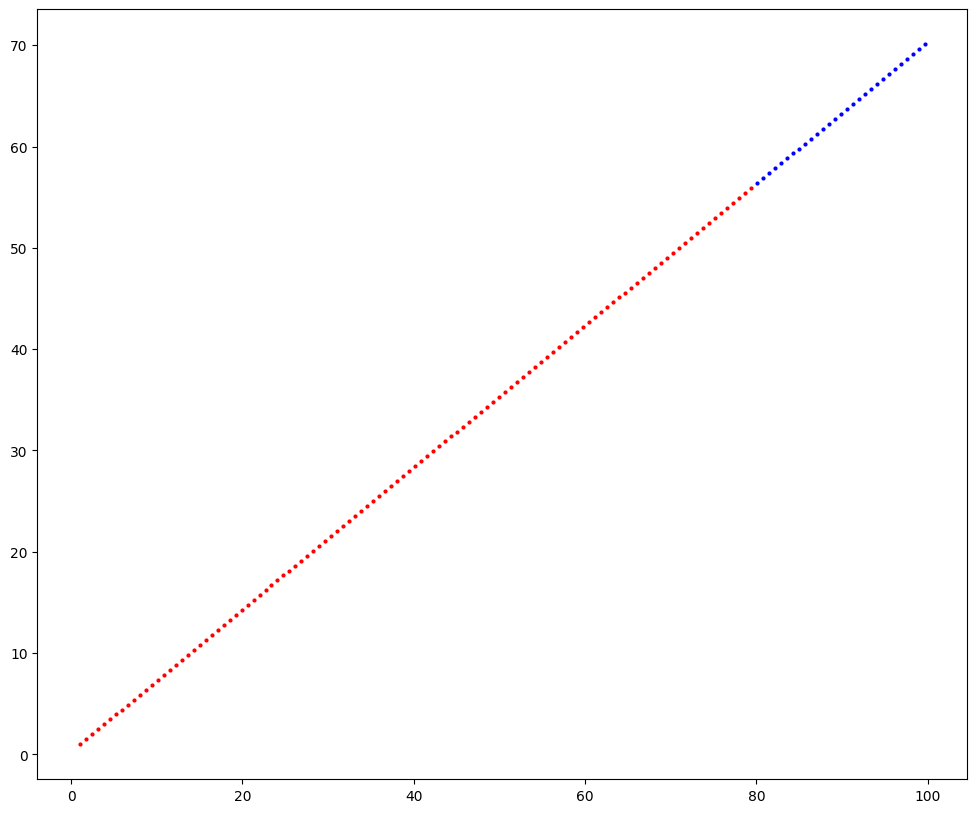

In [35]:
plot_pred()

In [94]:
class Linearmodel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.sigmoid = nn.Sigmoid()

  def forward(self,x:torch.Tensor) -> torch.Tensor:
    z = self.weight*x + self.bias
    y_pred = self.sigmoid(z)
    return y_pred

In [95]:
torch.manual_seed(42)

model_1 = Linearmodel()

list(model_1.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [96]:
model_1.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [97]:
y_pred = model_1(X_test)
y_pred

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]], grad_fn=<SigmoidBackward0>)

In [98]:
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])

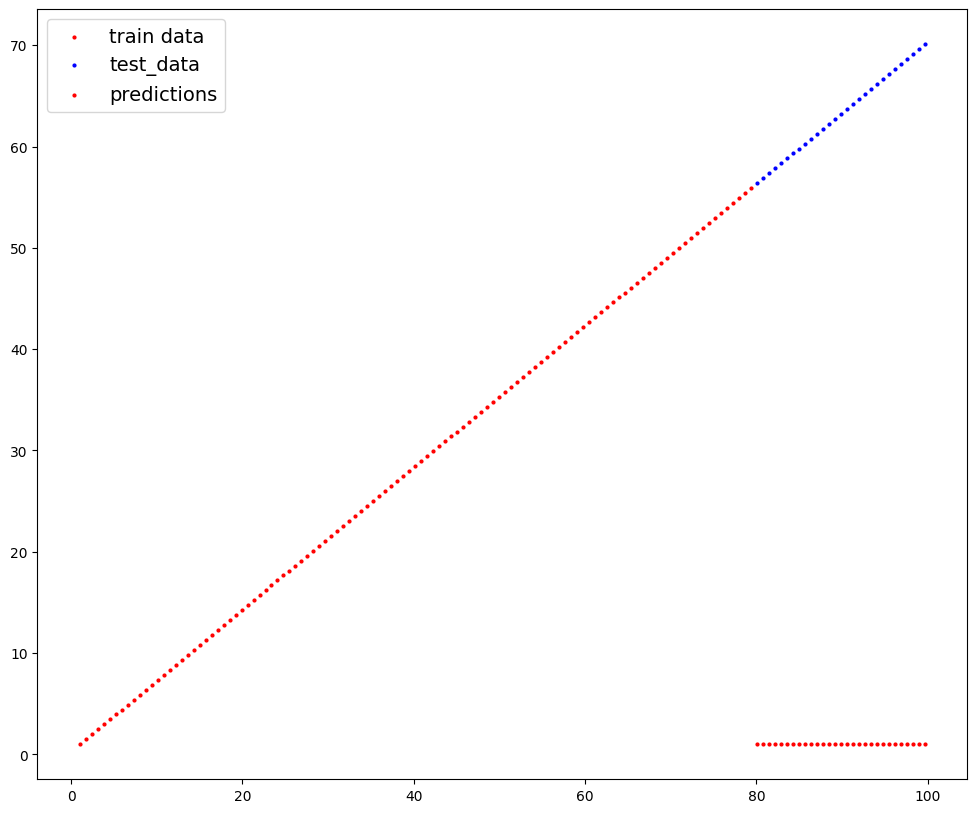

In [99]:
plot_pred(predictions=y_preds)


In [101]:
loss_fn =  nn.L1Loss()

optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.01)

In [102]:
torch.manual_seed(42)

epochs = 200
epoch_count = []
loss_values = []
test_loss_values = []
for epoch in range(epochs):
  model_1.train()

  y_pred = model_1(X_train)

  loss = loss_fn(y_pred,y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()
  model_1.eval()

  with torch.inference_mode():

    # with torch.no_grad(): # you may also see torch.no_grad() in older PyTorch code
    # 1. Do the forward pass
    test_pred = model_1(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    # Print out model state_dict()
    print(model_1.state_dict())

Epoch: 0 | Loss: 27.46004295349121 | Test loss: 62.230003356933594
OrderedDict([('weight', tensor([0.3374])), ('bias', tensor([0.1290]))])
Epoch: 1 | Loss: 27.459991455078125 | Test loss: 62.230003356933594
OrderedDict([('weight', tensor([0.3381])), ('bias', tensor([0.1291]))])
Epoch: 2 | Loss: 27.459941864013672 | Test loss: 62.230003356933594
OrderedDict([('weight', tensor([0.3388])), ('bias', tensor([0.1293]))])
Epoch: 3 | Loss: 27.45989227294922 | Test loss: 62.230003356933594
OrderedDict([('weight', tensor([0.3395])), ('bias', tensor([0.1294]))])
Epoch: 4 | Loss: 27.459840774536133 | Test loss: 62.230003356933594
OrderedDict([('weight', tensor([0.3401])), ('bias', tensor([0.1296]))])
Epoch: 5 | Loss: 27.45979118347168 | Test loss: 62.230003356933594
OrderedDict([('weight', tensor([0.3408])), ('bias', tensor([0.1297]))])
Epoch: 6 | Loss: 27.459745407104492 | Test loss: 62.230003356933594
OrderedDict([('weight', tensor([0.3415])), ('bias', tensor([0.1299]))])
Epoch: 7 | Loss: 27.459

In [103]:

with torch.inference_mode():
  y_pred_new = model_1(X_test)

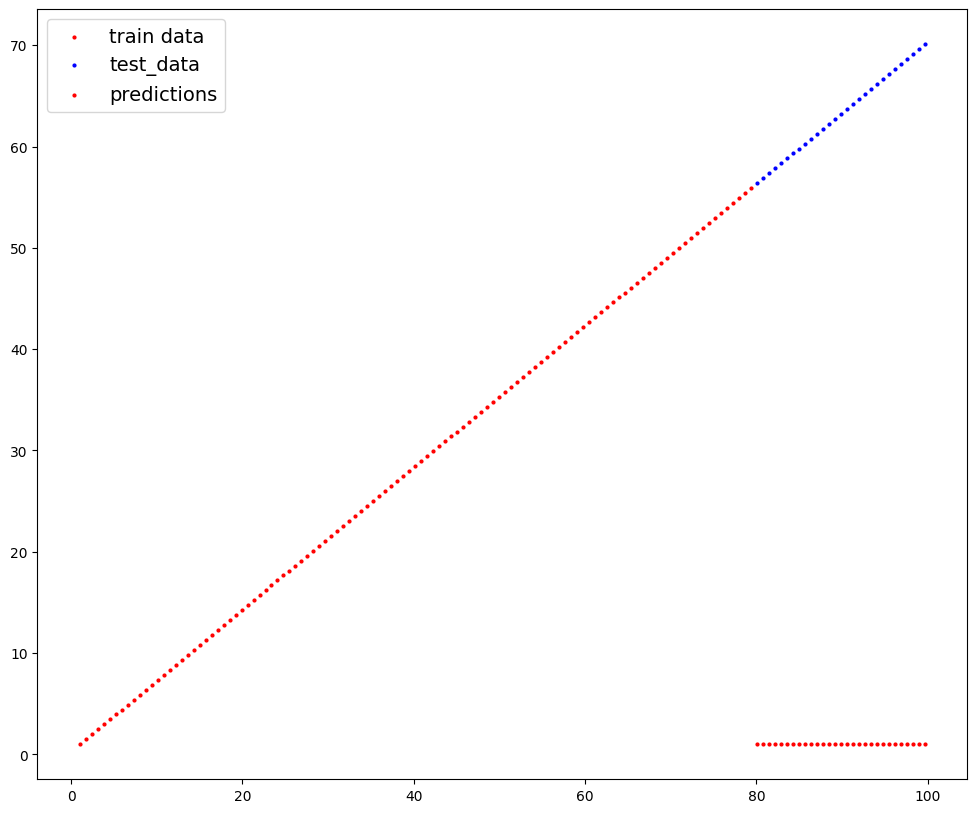

In [104]:
plot_pred(predictions=y_pred_new)